Importing Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features 
Y = rice_cammeo_and_osmancik.data.targets 
# metadata 
#print(rice_cammeo_and_osmancik.metadata) 
# variable information 
#print(rice_cammeo_and_osmancik.variables)

(a) The dataset didn't seem to need encoding, it's all numerical data. So I just split the dataset into 20% training data, 80% testing data using train_test_split. Then I initialize the Gini model and fit a tree to the training data using it.

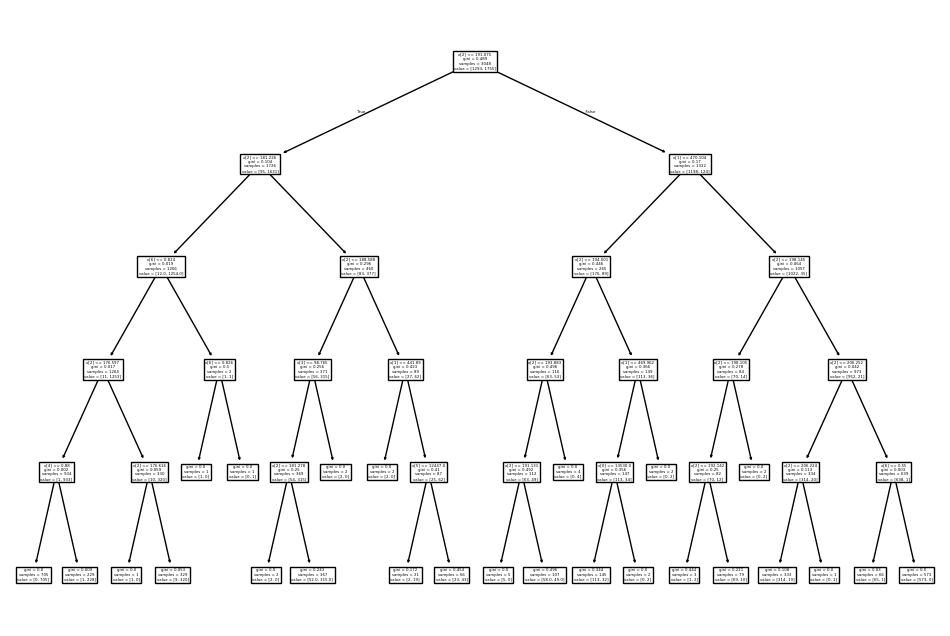

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

#partitions dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#defines Gini model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

#fits tree to training data using the model and visualizes tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, Y_train)) 
plt.show()

(b) I use predict_proba on our Gini model to make a probabalistic prediction for class labels in Y taking our test features X_test as input. I then compute cross-entropy between the predicted class labels using this model and the actual class labels from the target column in the test data using log_loss. Only one value is outputted since obviously the cross entropy should be the same for either class label.

In [ ]:
from sklearn.metrics import log_loss

#makes probabilistic predicition and computes cross-entropy between true labels and prediction
Y_gini_prob = clf_gini.predict_proba(X_test)
gini_cross_entropy = log_loss(Y_test, Y_gini_prob)

##prints the cross entropy value
print(f"Cross-entropy - (Gini): {gini_cross_entropy}")

Cross-entropy - (Gini): 0.3534348644437937


-
-
-
-
-
-
(c) I initialize the Information Gain model (which uses criterion 'entropy') and fit a tree to the training data using it.

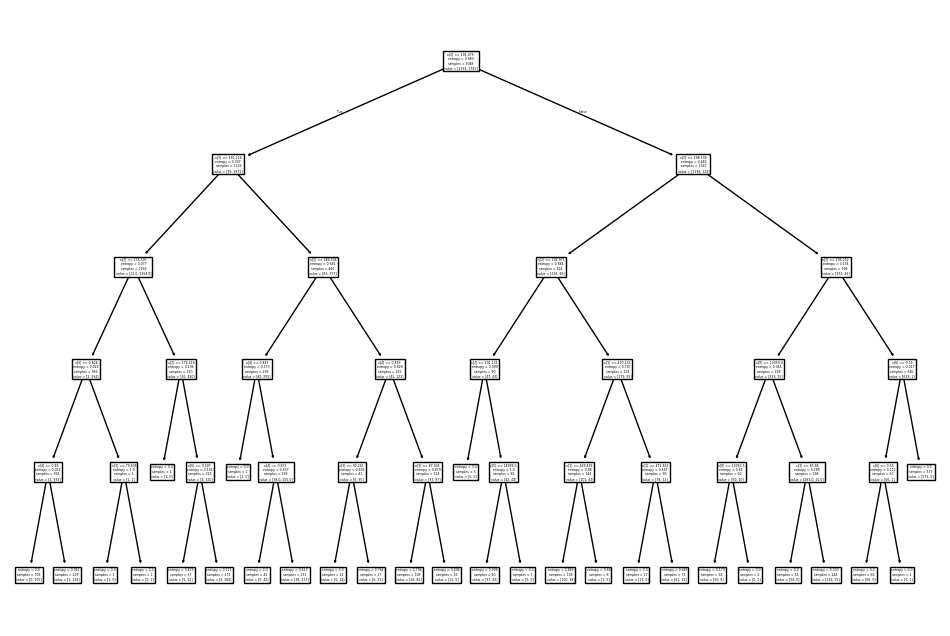

In [42]:
#defines Information Gain model
clf_IG = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

#fits tree to training data using the model and visualizes tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_IG.fit(X_train, Y_train)) 
plt.show()

(d) I use predict_proba on the Information Gain model to make a probabalistic prediction for class labels in Y taking our test features X_test as input. I then compute cross-entropy between the predicted class labels using this model and the actual class labels.

In [ ]:
#makes probabilistic prediction and computes cross-entropy
Y_IG_prob = clf_IG.predict_proba(X_test)
IG_cross_entropy = log_loss(Y_test, Y_IG_prob)

#prints the cross entropy value
print(f"Cross-entropy - (Information Gain): {IG_cross_entropy}")

Cross-entropy - (Information Gain): 0.34407631922115545


(e) Information Gain performed better since it had the lower cross-entropy value. So I fit a tree on the whole dataset using the Information Gain model.

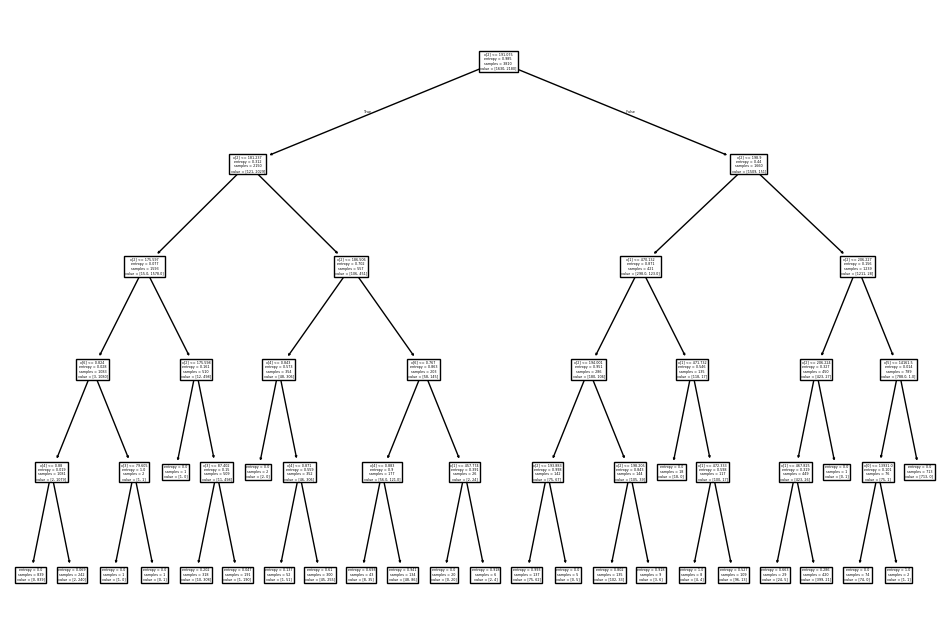

In [48]:
#Visualize Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_IG.fit(X, Y)) 
plt.show()